# Fiscal Year 2024 Budget Actuals

Importing data using the [***tabula-py***](https://pypi.org/project/tabula-py/) package and creating a Sankey diagram using the [***matplotlib.sankey package***](https://matplotlib.org/stable/gallery/specialty_plots/sankey_basics.html).

In [1]:
# importing packages
import tabula 
from tabula import read_pdf
import os
import pandas as pd
import string as str
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

In [2]:
# setting JAVA_HOME and PATH variables
os.environ['JAVA_HOME'] = '/Users/scipio/Documents/FA_Budget_PDFs/jdk-22.0.2.jdk/Contents/Home'
os.environ['PATH'] = '/Users/scipio/Documents/FA_Budget_PDFs/jdk-22.0.2.jdk/Contents/Home/lib/server'

In [3]:
# importing data from PDFs
df1 = pd.DataFrame(tabula.read_pdf('/Users/scipio/Downloads/FY_24_General_Actuals_PDF.PDF', 
                             pages = 'all', pandas_options = {'header':None})[0])
df2 = pd.DataFrame(tabula.read_pdf('/Users/scipio/Downloads/FY_24_General_Actuals_PDF.PDF', 
                             pages = 'all', pandas_options = {'header':None})[1])
df3 = pd.DataFrame(tabula.read_pdf('/Users/scipio/Downloads/FY_24_General_Actuals_PDF.PDF', 
                             pages = 'all', pandas_options = {'header':None})[2])
df4 = pd.DataFrame(tabula.read_pdf('/Users/scipio/Downloads/FY_24_General_Actuals_PDF.PDF', 
                             pages = 'all', pandas_options = {'header':None})[3])
df5 = pd.DataFrame(tabula.read_pdf('/Users/scipio/Downloads/FY_24_General_Actuals_PDF.PDF', 
                             pages = 'all', pandas_options = {'header':None})[4])

# combining dfs
df = pd.concat([df1,df2,df3,df4,df5])

In [4]:
df.head(1)

,0,1,2,3,4,5,6,7,8
0,130-100-101-100-043,Teacher Salaries PS,"1,249,986.00","(3,052.17)","1,246,933.83","1,246,933.83",0.00,0.00,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 7
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       191 non-null    object
 1   1       53 non-null     object
 2   2       191 non-null    object
 3   3       191 non-null    object
 4   4       191 non-null    object
 5   5       191 non-null    object
 6   6       191 non-null    object
 7   7       191 non-null    object
 8   8       191 non-null    object
dtypes: object(9)
memory usage: 14.9+ KB


In [6]:
# creating rename object to rename columns
rename = {
    0:'Expend. Account #',
    1:'Account Title',
    2:'Original Budget',
    3:'New App/Trnsf',
    4:'Revised Bgt',
    5:'Expenditures',
    6:'Encumbrances',
    7:'Avail Balance',
    8:'Refunds'
}

# renaming columns
df.rename(columns = rename, inplace = True)

df.head(1)

,Expend. Account #,Account Title,Original Budget,New App/Trnsf,Revised Bgt,Expenditures,Encumbrances,Avail Balance,Refunds
0,130-100-101-100-043,Teacher Salaries PS,"1,249,986.00","(3,052.17)","1,246,933.83","1,246,933.83",0.00,0.00,0.00


In [7]:
# data cleaning
df['Expenditures'] = df['Expenditures'].str.replace(',','').astype('float') #--> casting column as float

In [8]:
# creating campus column
df['Campus'] = df['Expend. Account #'].str.split('-').str[3]

# data cleaning
def agg_campus(row):
    if row['Campus'] in ['100','101']:
        return 100
    elif row['Campus'] in ['200','201']:
        return 200
    elif row['Campus'] in ['300','301']:
        return 300
    elif row['Campus'] in ['500','501']:
        return 500
    else:
        return row['Campus']

df['Campus_Agg'] = df.apply(agg_campus, axis = 1)

In [9]:
# aggregating actuals based on campus
fy_24_actuals = df.groupby('Campus_Agg')['Expenditures'].sum().reset_index()

# finding percentage of expenditures for each campus
fy_24_actuals['%'] = round(fy_24_actuals['Expenditures']/fy_24_actuals['Expenditures'].sum(),2)

In [10]:
print("The expenditures for fiscal year 2024 was",f"${fy_24_actuals['Expenditures'].sum():,}")

The expenditures for fiscal year 2024 was $19,529,428.44


In [115]:
# data cleaning
fy_24_actuals['%'] = round(fy_24_actuals['Expenditures']/fy_24_actuals['Expenditures'].sum(),2) #--> finding percentage

fy_24_actuals['Expenditures'] = round(fy_24_actuals['Expenditures'],3).apply(lambda x: f'${x:,}') #--> adding comma separator

In [116]:
# displaying data
fy_24_actuals

,Campus_Agg,Expenditures,%
0,100,"$1,834,405.69",0.09
1,200,"$1,397,904.33",0.07
2,300,"$2,095,660.48",0.11
3,500,"$2,827,902.3",0.14
4,000,"$11,373,555.64",0.58


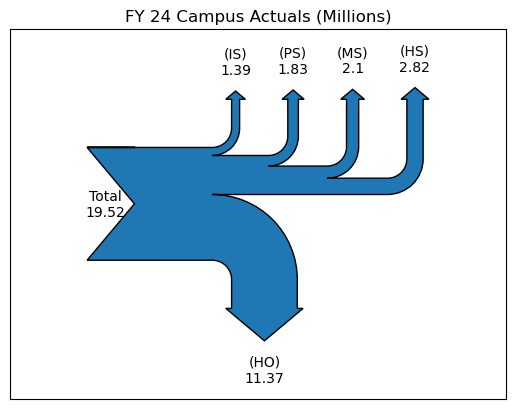

<Figure size 1500x1500 with 0 Axes>

In [142]:
# Creating Sankey Diagram

Sankey(
    flows = [19.52,-1.39,-1.83,-2.10,-2.82,-11.37], #--> data
    labels = ['Total','(IS)','(PS)','(MS)','(HS)','(HO)'], #--> labels
    scale = 0.03, #--> scaling factor for flow paths
    orientations = [0,1,1,1,1,-1],#--> orientation of the flow arrows
      ).finish()

plt.title('FY 24 Campus Actuals (Millions)') #--> title
plt.figure(figsize = (15,15))

# displaying plot
plt.show()